In [4]:
pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host=files.pythonhosted.org tensorflow pandas numpy matplotlib opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [5]:
# Load and Preprocess the data
batch_size = 32
img_height = 48
img_width = 48

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/train',
    image_size = (img_height, img_width),
    batch_size = batch_size,
    color_mode = 'grayscale'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/test',
    image_size = (img_height, img_width),
    batch_size = batch_size,
    color_mode = 'grayscale'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/val',
    image_size = (img_height, img_width),
    batch_size = batch_size,
    color_mode = 'grayscale'
)

normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda X, y: (normalization_layer(X), tf.one_hot(y, depth = 7)))
test_ds = test_ds.map(lambda X, y: (normalization_layer(X), tf.one_hot(y, depth = 7)))
val_ds = val_ds.map(lambda X, y: (normalization_layer(X), tf.one_hot(y, depth = 7)))

Found 28709 files belonging to 7 classes.
Found 3589 files belonging to 7 classes.
Found 3589 files belonging to 7 classes.


In [23]:
# Build the Model
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',
    input_shape = (img_height, img_width,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(7,activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
#Train the Model
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 30
)

Epoch 1/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 1481s 2s/step - accuracy: 0.2646 - loss: 1.7909 - val_accuracy: 0.4269 - val_loss: 1.4928
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.4281 - loss: 1.4858 - val_accuracy: 0.4770 - val_loss: 1.3625
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.4736 - loss: 1.3611 - val_accuracy: 0.5104 - val_loss: 1.2941
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.5133 - loss: 1.2830 - val_accuracy: 0.4929 - val_loss: 1.3143
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step - accuracy: 0.5321 - loss: 1.2381 - val_accuracy: 0.5308 - val_loss: 1.2413
Epoch 6/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.5484 - loss: 1.1873 - val_accuracy: 0.5319 - val_loss: 1.2373
Epoch 7/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step - accuracy: 0.5667 - loss: 1.1456 - val_accuracy: 0.5400 - val_loss: 1.2026
Epoch 8/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 31s 35ms/step - accuracy: 0.5862 - loss: 1.1010 - 

In [25]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(test_ds)
print(f'Test Loss:{test_loss}')
print(f'Test Accuracy:{test_acc}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 54s 475ms/step - accuracy: 0.5723 - loss: 1.7231
Test Loss:1.759674310684204
Test Accuracy:0.5681248307228088


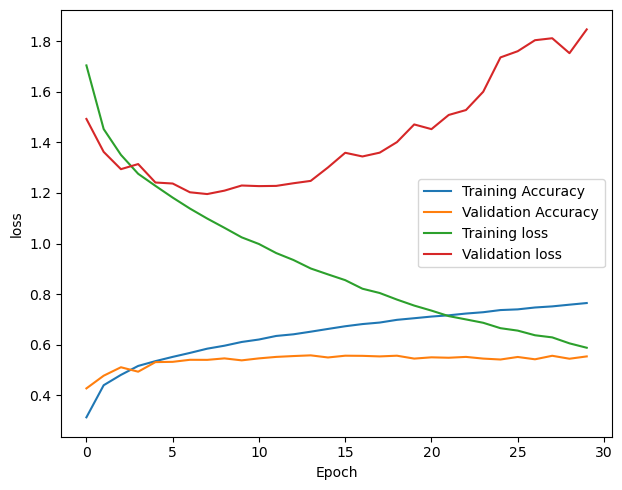

In [26]:
#Visualize Training History
plt.figure(figsize=(12,5))
#plot accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


#plot loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
#Predictions (Inference)
def predict_emotion(image_path):
    img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(48,48))
    img = img.reshape(1,48,48,1)/255.0
    prediction = model.predict(img)
    emotion_label = ['Angry','Disgust','Fear','Happy','Sad','Neutral','Surprise']
    predict_emotion = emotion_label[np.argmax(prediction)]
    return predict_emotion

In [36]:
#Example
image_path = '3.jpg'
predicted_emotion = predict_emotion(image_path)
print(f'Predicted Emotion: {predicted_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Emotion: Surprise
